In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno

In [2]:
df = pd.read_csv('bike_sharing_daily.csv')

# Missing_Value 코드

### 결측값 제거!

In [11]:
# 결측값 제거하기

df_dropall = df.dropna(how='all') # 모든 컬럼이 결측값만 행제거 (결측값 없는 컬럼이 있으면 제거가 안 된다.)

# na값을 결측값의 개수를 조정해서 drop할 수 있다.
# 두 개 이상의 컬럼이 결측값인 행 제거
df_droptwo= df.dropna(thresh = 2)

# 특정 컬럼을 지정해서 결측값을 제거 가능
df_temp_drop = df.dropna(subset=['temp'])

# any 한 컬럼이라도 결측치가 있으면 행 제거 
df_any_drop =df.dropna(how='any')

## 단순하게 문법을 이용해서 조건을 거는 것
## 좀 더 복잡한 로직의 Missing_Value 흔히 말하는 if문 가지고 접근하는 것
## 어떤 컬럼안에 어떤 값은 Missing_value 만든다 

### 결측값 단순 대체!
- 결측값을 대체하는 방법은 정말 다양하고
- 결측값을 대체하는 방법은 데이터의 분포나 도메인에 따라 다릅니다.
- 단순하게 우리가 배운 것들로만 하는 게 아니라, 데이터의 도메인과 분포와 전반적인 기술통계값을 보면서 우리가 접근해 나가야 합니다.
- 모델링을 위한 대체, 기술적인 집계를 보기 위한 대체일 수 있고 목적이 다 다를테니깐 다양한 상황에 맞게 꼭 접근하셔야 합니다!

In [ ]:
## 결측값 기본 대치 방법
# fillna() na값을 어떤 원하는 값을 대체한다

In [27]:
df_0fill = df.fillna(0) # 0으로 대체 

df_hifill = df.fillna('안녕?') # 문자로로 대체 가능

# 평균, 분산, 표준편차, 최대, 최소 중위 등등 다 가능하다.
# 평균 대체
df_meanfill =df.fillna(df['temp'].mean()) #전체컬럼 

# 컬럼에 따라 대체하는 방법을 다르게 하고 싶다!
df_meanfill_sp=df.fillna({'temp':df['temp'].mean()}) #특정 컬럼만 지정

#중앙값, 최빈값, 최대, 최소 직접 해보세요!
#median, mode, max, min , var, std 다 가능하다! 



### 결측값 대체 중 보간법!
- 보간법 보외법
- 보간법은 결국 양쪽 값들 사이에서 중간에 Missing Value를 주변의 값들을 통해서 유추하고 대체한다!

In [31]:
df_sp1 = df.copy()

In [47]:
#전 시점의 값들로 대체
df_sp1['temp'].fillna(method='pad',inplace=True) #시계열 데이터의 특성에서 바라보면 시간의 흐름에 따라 데이터들이 쌓이고 영향을 받는 것
# 과거 전 시점의 값들로 대체를 해야 하는 경우 

#뒤 시점의 값으로 대치하는 것
df.fillna(method='bfill')
#결측값을 여러 번 대치할지 아니면 한 번만 할지 방법을 조절할 수 있다.
df.fillna(method='bfill', limit= 1) #연속된 결측값이 있으면 한 번만 대치한다!


#보간법
#특정 값으로 대치할 수 있다.
#interpolate() 함수를 이용해서 사용

df_sp_lin=df.interpolate(method='values') # na값 기준으로 봤을 때 양 사이의 값의 평균  # 1차선형 방법 2차,3차 다양하게 매끄럽게 대체할 수 있다.


ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got values

In [48]:
# 시계열 데이터이다 보니 시계열 객체로 대체 가능
# 판다스에서 제공하는 pd.to_datetime()시계열 데이터로 컬럼을 만드는 법

df['dteday'] = pd.to_datetime(df['dteday'])

# 시계열 데이터를 인덱스로 지정

df_time = df.set_index('dteday') # 시계열 컬럼을 인덱스로 지정

In [1]:
df_time

NameError: name 'df_time' is not defined

In [52]:
df_time.loc['2012'] # 시계열 데이터는 내가 원하는 요일, 특정한 날 등을 지정할 수 있다. 인덱스 들어가서!

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-01-01,366,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686.0,1608.0,2294
2012-01-02,367,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244.0,1707.0,1951
2012-01-03,368,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89.0,2147.0,2236
2012-01-04,369,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95.0,2273.0,2368
2012-01-05,370,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140.0,3132.0,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341


In [53]:
# 시점에 따른 보간법
df_time_sp=df_time.interpolate(method='time')

In [54]:
df_time_sp

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.282931,0.437273,0.248309,120.0,1229.0,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.234521,0.590000,0.155471,644.0,2451.0,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341


### sklearn 패키지를 가지고 대체하기!
- 방법은 동일한데 다양하게 사용할 수 있다.
- 패키지를 가지고 오면 더 많은 것들 할 수 있다.

In [56]:
from sklearn.impute import SimpleImputer #단순하게 대치할 수 있는 패키지

constant_imputer =SimpleImputer(strategy='constant') #내가 원하는 결측치 대체 방법


In [57]:
constant_imputer

SimpleImputer(strategy='constant')

In [60]:
df_temp_simple=constant_imputer.fit_transform(df[['temp','atemp']]) #2개 넣어서 2차원 배열로 만듦

In [62]:
pd.DataFrame(df_temp_simple) #패키지를 가지고 다양하게 대치할 수 있다.

,0,1
0,0.344167,0.363625
1,0.363478,0.353739
2,0.196364,0.000000
3,0.200000,0.212122
4,0.226957,0.229270
...,...,...
726,0.254167,0.226642
727,0.253333,0.000000
728,0.253333,0.242400
729,0.000000,0.231700


In [63]:
constant_imputer =SimpleImputer(strategy='mean') #내가 원하는 결측치 대체 방법 평균으로 진행 

In [64]:
df_temp_simple=constant_imputer.fit_transform(df[['temp','atemp']]) #2개 넣어서 2차원 배열로 만듦

In [65]:
pd.DataFrame(df_temp_simple) #패키지를 가지고 다양하게 대치할 수 있다.

,0,1
0,0.344167,0.363625
1,0.363478,0.353739
2,0.196364,0.474674
3,0.200000,0.212122
4,0.226957,0.229270
...,...,...
726,0.254167,0.226642
727,0.253333,0.474674
728,0.253333,0.242400
729,0.497644,0.231700


- SimpleImputer 구글링만 해도 잘 나옵니다!

In [66]:
train = pd.read_csv('train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 타이타닉 데이터를 가지고 시각화를 통해 결측값이 대체되는 것을 확인하자!

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_69018/373441941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(train.Age))


Axes(0.125,0.11;0.775x0.77)
177


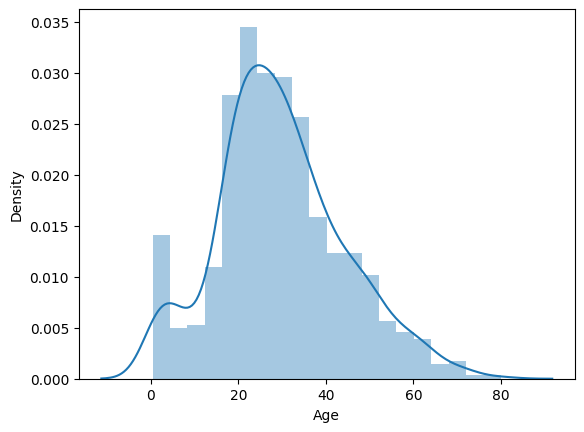

In [69]:
print(sns.distplot(train.Age))
print(train.Age.isna().sum())

In [71]:
train_most_fq = train.copy()

In [70]:
constant_imputer =SimpleImputer(strategy='most_frequent') # 가장 빈도가 높은 값으로도 대체 가능

In [73]:
train_most_fq = constant_imputer.fit_transform(train_most_fq)

In [75]:
pd.DataFrame(train_most_fq)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


## 다음 패키지는 KNNImputer
- KNN알고리즘을 통해 거리기반으로 값들을 대치하는 방법!

In [89]:
train_knn['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [92]:
from sklearn.impute import KNNImputer
train_knn = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors =2, weights = 'uniform') #근처 3개 값을 기준으로 대치한다. #가중치 weights 
train_knn['Age'] = knn_imputer.fit_transform(np.array(train_knn['Age']).reshape(-1,1)) # 1차원 컬럼만 넣으니깐 행,열 transpoze 개념으로 바꿔서 형식 맞춘 것 배열로 형변환

In [95]:
train_knn['Age'].isna().sum()

0

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_69018/373441941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(train.Age))


Axes(0.125,0.11;0.775x0.77)
177


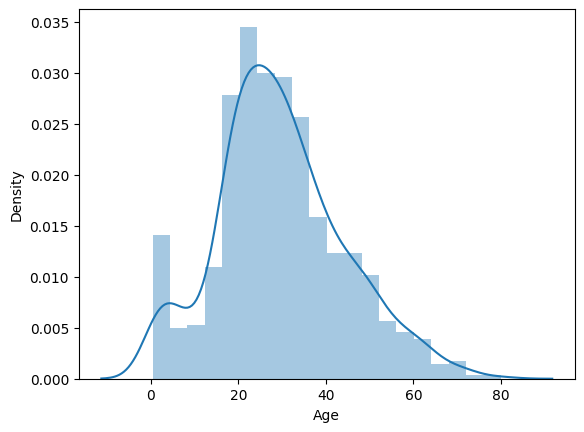

In [96]:
print(sns.distplot(train.Age))
print(train.Age.isna().sum())

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_69018/2642624171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(train_knn.Age))


Axes(0.125,0.11;0.775x0.77)
0


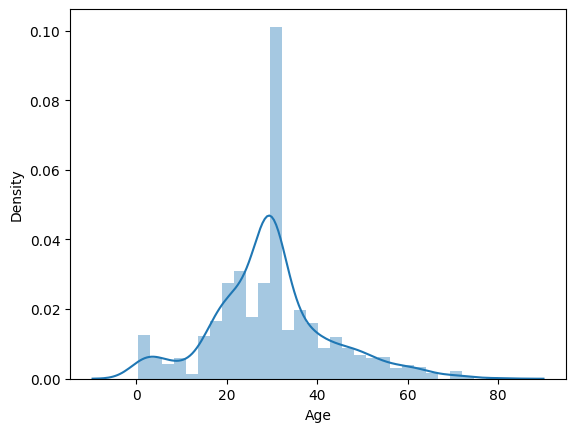

In [97]:
print(sns.distplot(train_knn.Age))
print(train_knn.Age.isna().sum())

In [98]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# 다중대치법으로 진행 MICE -> 표준오차 추정하는 방식으로 값을 대치하는 것 

In [101]:
train_mice = train.copy()

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(np.array(train_mice['Age']).reshape(-1,1)) 

In [103]:
train_mice.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64